Réalisé par :
AMEZIANE Douaa & KAMAL Aymane

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
plt.style.use('ggplot')
sns.set_style("darkgrid")

We will read the CSV file named "Amazon".

In [2]:
filex= pd.read_csv('amazon.csv')

After that, we display the dimensions of the CSV file.

In [3]:
filex.shape

(9668, 12)

We need to visualize the columns of the CSV file.

In [4]:
filex.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

For better display, we should first visualize the first five rows of each column.

In [5]:
filex.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


Before starting data manipulation, it's important to know the data type of each piece of information.

In [6]:
filex.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Here we visualize the first 5 rows of the categories named "listed_in".

In [7]:
filex['listed_in'].head()

0              Comedy, Drama
1       Drama, International
2    Action, Drama, Suspense
3                Documentary
4             Drama, Fantasy
Name: listed_in, dtype: object

We use isna() to check if there are any missing values.

In [8]:
filex.isna().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

<span style="font-size:large;">Question 1</span>

Using the "matplotlib" and "seaborn" libraries, we generate our graph to display the top 5 categories.

Text(0.5, 1.0, 'Best 5 Amazon categories')

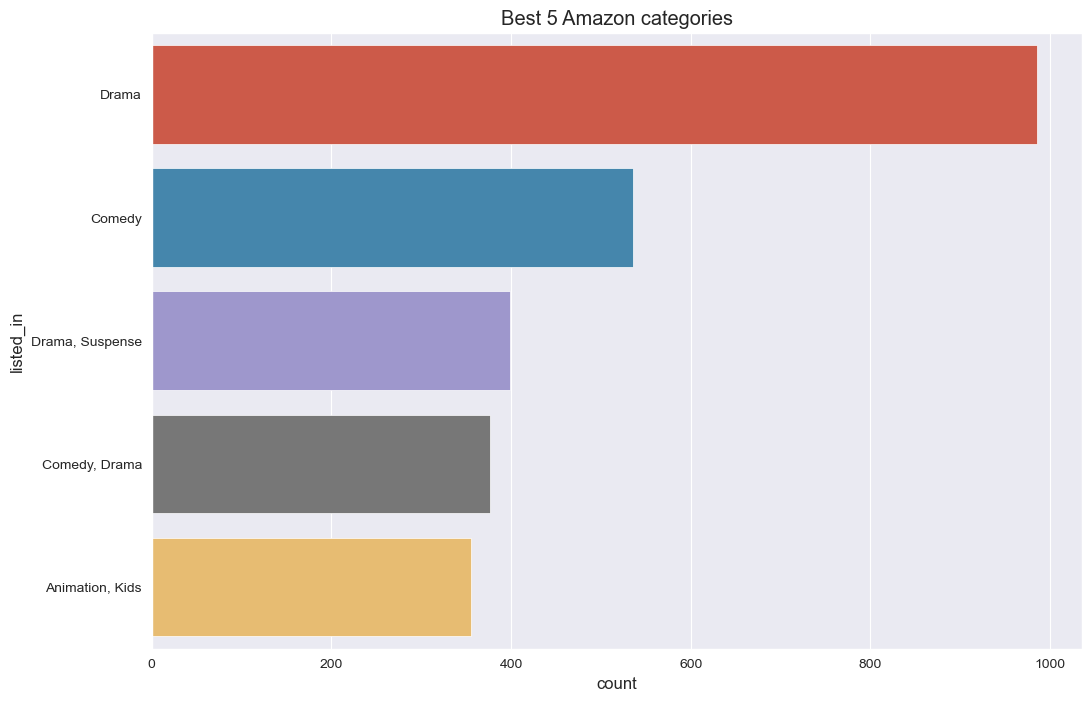

In [9]:
plt.figure(figsize =(12,8))
sns.countplot(y='listed_in',order=filex['listed_in'].value_counts().index[0:5], data=filex)
plt.title('Best 5 Amazon categories')

<span style="font-size:larger;">Question 2</span>



We focus here on the directors column; first, we sort the filtered column, then we will filter it by order to obtain the top 5 directors.

Text(0.5, 1.0, 'Top 5 best Directors')

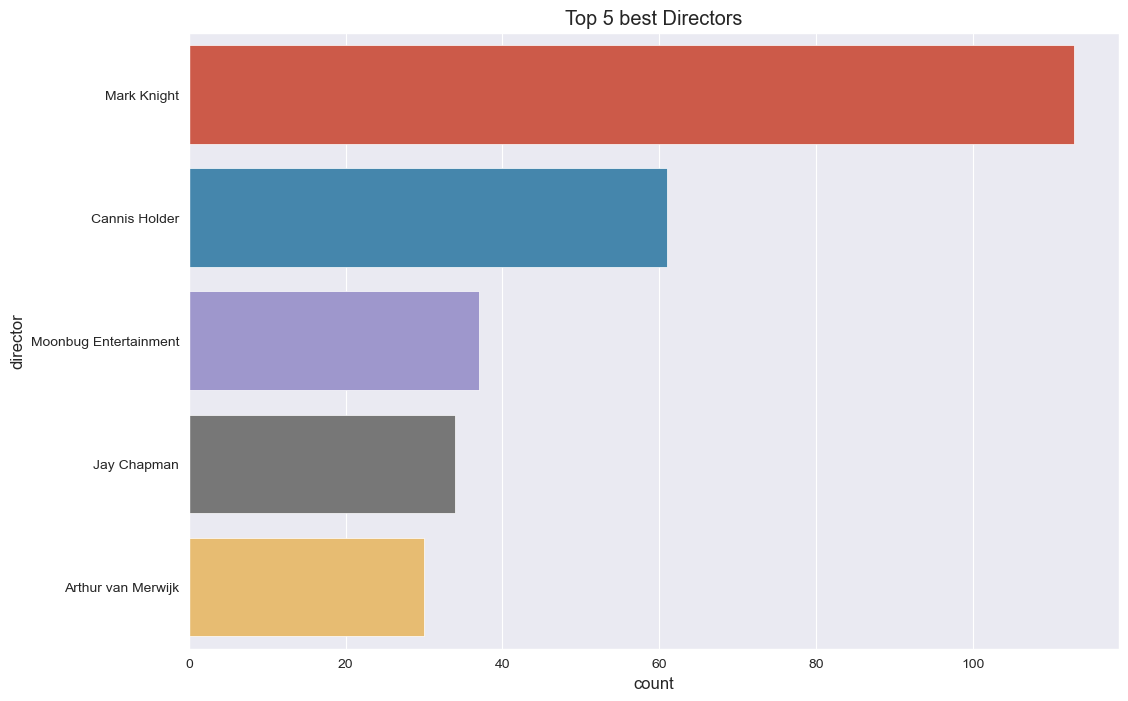

In [10]:
filterfilex=filex[filex['director']!='not found']
plt.figure(figsize=(12,8))
sns.countplot(y='director',order=filterfilex['director'].value_counts().index[0:5],data=filterfilex)
plt.title("Top 5 best Directors")

In [11]:
filex.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


<span style="font-size:larger;">Question 3</span>

Here, we first take a copy of the 'cast' column, naming the new copy 'actor'. We split the actors' names by commas using str.split(), then we use explode() to turn each actor's name into its own row. Afterward, we simply count the occurrences of each actor and finally visualize the results.

In [12]:
filexcopy=filex.copy()
filexcopy['actor']=filexcopy['cast'].str.split(',')
filexcopy = filexcopy.explode('actor')
actorcounts =filexcopy['actor'].value_counts()
actorcounts

actor
Maggie Binkley    56
1                 35
Gene Autry        32
 Nassar           30
 Champion         29
                  ..
Michelle Bauer     1
 smapath Raj       1
 Mamatha           1
 Jeff Bloking      1
 Joseph Gilgun     1
Name: count, Length: 33914, dtype: int64

Text(0.5, 1.0, 'Top 10 Actors On Amazon')

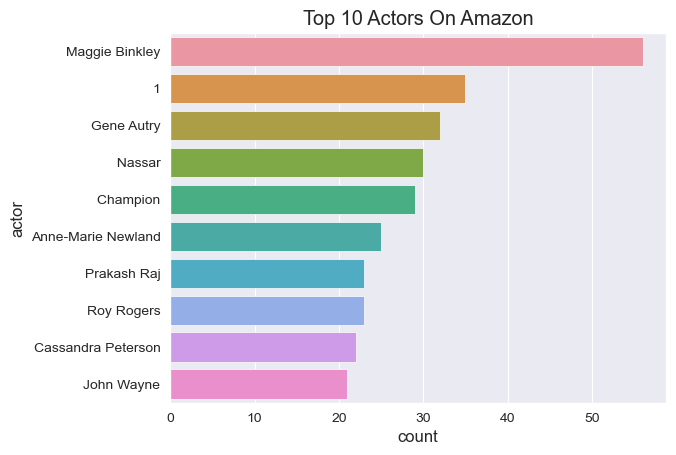

In [13]:
sns.countplot(y='actor',order=actorcounts.index[0:10], data=filexcopy)
plt.title('Top 10 Actors On Amazon')

<span style="font-size:larger;">Question 4</span>

We will focus on the "TV shows" type, then we will sort the values by duration, which contains the number of seasons, and finally, we will display the first 5 results.

In [14]:
top_series = filex[filex['type'] == 'TV Show'].sort_values(by='duration', ascending=False).head(5)
print(top_series[['title', 'duration']])

             title   duration
800      Teen Wolf  9 Seasons
185        Vikings  9 Seasons
1081        Scrubs  9 Seasons
3571  'Allo 'Allo!  9 Seasons
867          Suits  9 Seasons


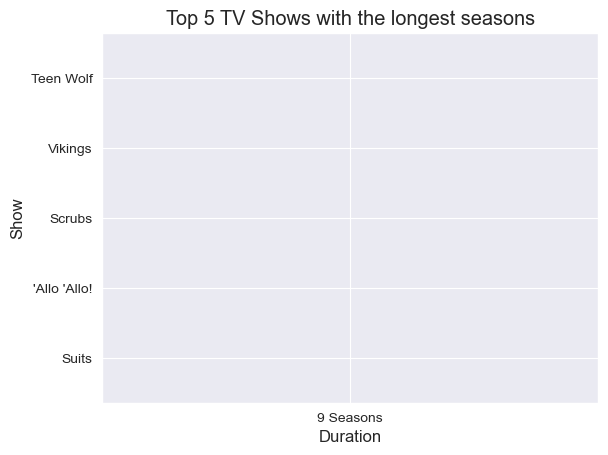

In [15]:
top_series = filex[filex['type'] == 'TV Show'].sort_values(by='duration', ascending=False).head(5)
top_series = top_series.iloc[::-1]
plt.barh(top_series['title'], top_series['duration'])

plt.title('Top 5 TV Shows with the longest seasons')
plt.xlabel('Duration')
plt.ylabel('Show')

#
plt.show()

<span style="font-size:larger;">Question 5</span>

To identify similar content by matching textual features, we will focus on the "description" column. Then, we will compare the characters composing the description of each type. Finally, we will show the results.

Reference Content
show_id                                                        s1
type                                                        Movie
title                                         The Grand Seduction
director                                             Don McKellar
cast               Brendan Gleeson, Taylor Kitsch, Gordon Pinsent
country                                                    Canada
date_added                                         March 30, 2021
release_year                                                 2014
rating                                                        NaN
duration                                                  113 min
listed_in                                           Comedy, Drama
description     A small fishing village must procure a local d...
Name: 0, dtype: object

Similar Contents
show_id                                             s5015
type                                                Movie
title           Mobutu's African 

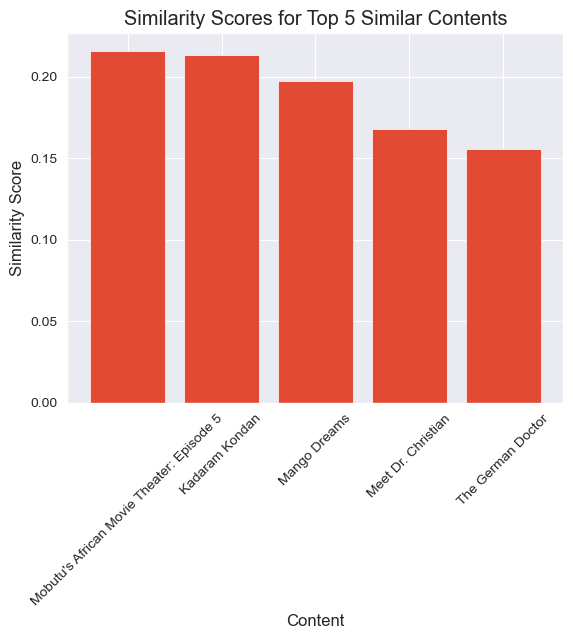

In [16]:
descriptions = filex['description'].fillna('')  

vectorizer = TfidfVectorizer()
description_vectors = vectorizer.fit_transform(descriptions)
similarity_matrix = cosine_similarity(description_vectors)
content_index = 0
similar_contents = similarity_matrix[content_index].argsort()[::-1][1:]
similar_content_indices = similar_contents[:5]
print("Reference Content")
print(filex.iloc[content_index])


print("\nSimilar Contents")
for index in similar_content_indices:
    print(filex.iloc[index])

similarities = similarity_matrix[content_index][similar_content_indices]
plt.bar(filex.iloc[similar_content_indices]['title'], similarities)

plt.title('Similarity Scores for Top 5 Similar Contents')
plt.xlabel('Content')
plt.ylabel('Similarity Score')


plt.xticks(rotation=45)

# Show the plot
plt.show()

<span style="font-size:larger;">Question 6</span>


We'll simply count the number of types in the CSV file. We notice that the dominant type in Amazon is movies.

Text(0.5, 1.0, 'best type')

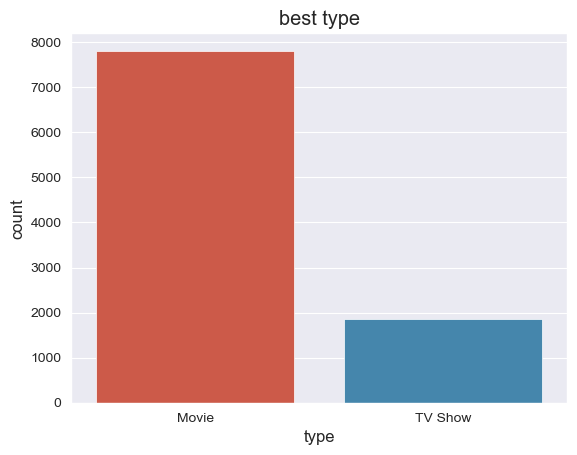

In [17]:
sns.countplot(x='type',data=filex)
plt.title('best type')

Réalisé par :
AMEZIANE Douaa & KAMAL Aymane